In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


import warnings

warnings.filterwarnings('ignore')

In [2]:
#Import Data containing transactions
data = pd.read_csv('/content/Data Science Evaluation.csv', encoding = 'unicode_escape')
data.head()

,Region,Country,Item_Type,Fiscal_Year,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Profit_as_%_of_Cost
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,4/23/2010,241891753,4/26/2010,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,6/6/2010,530075585,7/1/2010,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,1/2/2011,293357980,1/22/2011,10000,109.28,35.84,1092800.0,358400.0,734400.0,2.049107
3,Europe,Sweden,Office Supplies,2012,Online,L,10/2/2012,360841929,10/20/2012,10000,651.21,524.96,6512100.0,5249600.0,1262500.0,0.240495
4,Europe,Romania,Cosmetics,2016,Online,M,3/16/2016,707318103,5/3/2016,10000,437.20,263.33,4372000.0,2633300.0,1738700.0,0.660274


In [3]:
#Check the shape (number of columns and rows) in the dataset
data.shape

(65535, 16)

In [4]:
#Check for missing values in the dataset
data.isnull().sum(axis=0)

Region                 0
Country                0
Item_Type              0
Fiscal_Year            0
Sales_Channel          0
Order_Priority         0
Order_Date             0
Order_ID               0
Ship_Date              0
Units_Sold             0
Unit_Price             0
Unit_Cost              0
Total_Revenue          0
Total_Cost             0
Total_Profit           0
Profit_as_%_of_Cost    0
dtype: int64

In [5]:
#Convert the string dates field to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Ship_Date'] = pd.to_datetime(data['Ship_Date'])

In [6]:
#Add new column depicting No. of Days between Order date and Shipment Date
data['Days_Before_Shipment'] = (data['Ship_Date'] - data['Order_Date']).dt.days

In [7]:

data.head()

,Region,Country,Item_Type,Fiscal_Year,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Profit_as_%_of_Cost,Days_Before_Shipment
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,2010-04-23,241891753,2010-04-26,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887,3
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,2010-06-06,530075585,2010-07-01,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887,25
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,2011-01-02,293357980,2011-01-22,10000,109.28,35.84,1092800.0,358400.0,734400.0,2.049107,20
3,Europe,Sweden,Office Supplies,2012,Online,L,2012-10-02,360841929,2012-10-20,10000,651.21,524.96,6512100.0,5249600.0,1262500.0,0.240495,18
4,Europe,Romania,Cosmetics,2016,Online,M,2016-03-16,707318103,2016-05-03,10000,437.20,263.33,4372000.0,2633300.0,1738700.0,0.660274,48


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Region                65535 non-null  object        
 1   Country               65535 non-null  object        
 2   Item_Type             65535 non-null  object        
 3   Fiscal_Year           65535 non-null  int64         
 4   Sales_Channel         65535 non-null  object        
 5   Order_Priority        65535 non-null  object        
 6   Order_Date            65535 non-null  datetime64[ns]
 7   Order_ID              65535 non-null  int64         
 8   Ship_Date             65535 non-null  datetime64[ns]
 9   Units_Sold            65535 non-null  int64         
 10  Unit_Price            65535 non-null  float64       
 11  Unit_Cost             65535 non-null  float64       
 12  Total_Revenue         65535 non-null  float64       
 13  Total_Cost      

## Exploratory Data Analysis

In [9]:
#Descriptive Statistics (Whole Data)
data.describe()

,Fiscal_Year,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Profit_as_%_of_Cost,Days_Before_Shipment
count,65535.000000,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,6.553500e+04,6.553500e+04,65535.000000,65535.000000
mean,2013.309560,5.529922e+08,4987.064500,266.192472,187.606190,1.326827e+06,9.350665e+05,3.917610e+05,0.610672,25.033570
std,2.199086,2.605409e+08,2890.993357,216.999838,175.613364,1.466334e+06,1.146901e+06,3.784097e+05,0.466814,14.687349
min,2010.000000,1.000149e+08,1.000000,9.330000,6.920000,3.732000e+01,2.768000e+01,9.640000e+00,0.156846,0.000000
25%,2011.000000,3.267064e+08,2470.000000,81.730000,56.670000,2.764137e+05,1.626588e+05,9.566828e+04,0.348266,12.000000
50%,2013.000000,5.521281e+08,4983.000000,205.700000,117.110000,7.873129e+05,4.659253e+05,2.809080e+05,0.565887,25.000000
75%,2015.000000,7.786878e+08,7500.000000,437.200000,263.330000,1.810119e+06,1.197962e+06,5.632895e+05,0.660274,38.000000
max,2017.000000,9.999939e+08,10000.000000,668.270000,524.960000,6.682032e+06,5.249600e+06,1.738700e+06,2.049107,50.000000


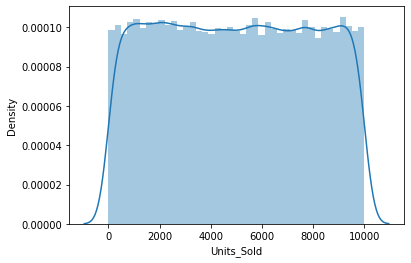

In [10]:
#Units Sold distribution plot
import seaborn as sns
x =data['Units_Sold']

ax = sns.distplot(x)

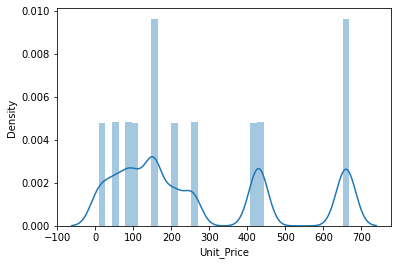

In [11]:
#Unit Price distribution plot
import seaborn as sns
x =data['Unit_Price']

ax = sns.distplot(x)

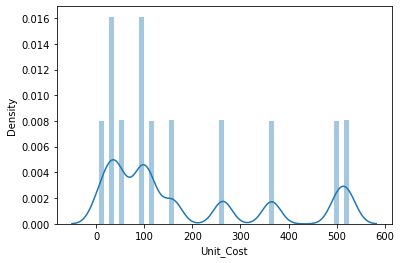

In [12]:
#Unit Cost distribution plot
import seaborn as sns
x =data['Unit_Cost']

ax = sns.distplot(x)

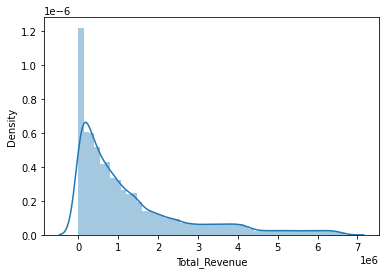

In [13]:
#Total Revenue distribution plot
import seaborn as sns
x =data['Total_Revenue']

ax = sns.distplot(x)

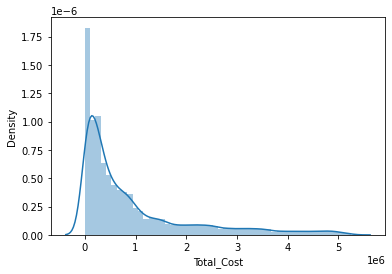

In [14]:
#Total Cost distribution plot
import seaborn as sns
x =data['Total_Cost']

ax = sns.distplot(x)

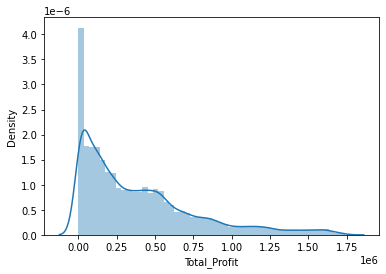

In [15]:
#Total Profit distribution plot
import seaborn as sns
x =data['Total_Profit']

ax = sns.distplot(x)

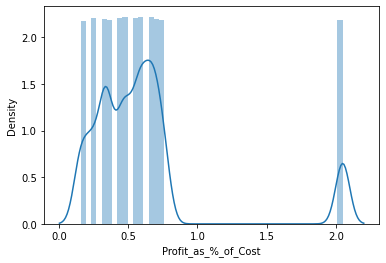

In [16]:
#Profit Markup(%) distribution plot
import seaborn as sns
x =data['Profit_as_%_of_Cost']

ax = sns.distplot(x)

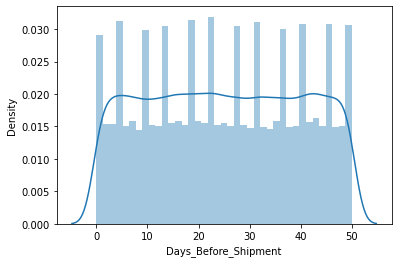

In [17]:
#No. of Days Before Shipment distribution plot
import seaborn as sns
x =data['Days_Before_Shipment']

ax = sns.distplot(x)

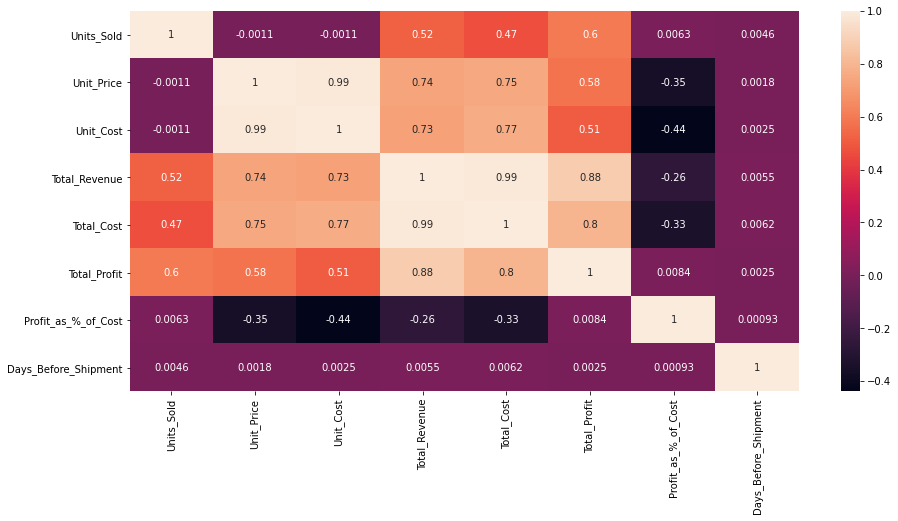

In [18]:
#Correlation between features



corr = data[['Units_Sold','Unit_Price','Unit_Cost','Total_Revenue','Total_Cost','Total_Profit','Profit_as_%_of_Cost','Days_Before_Shipment']].corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

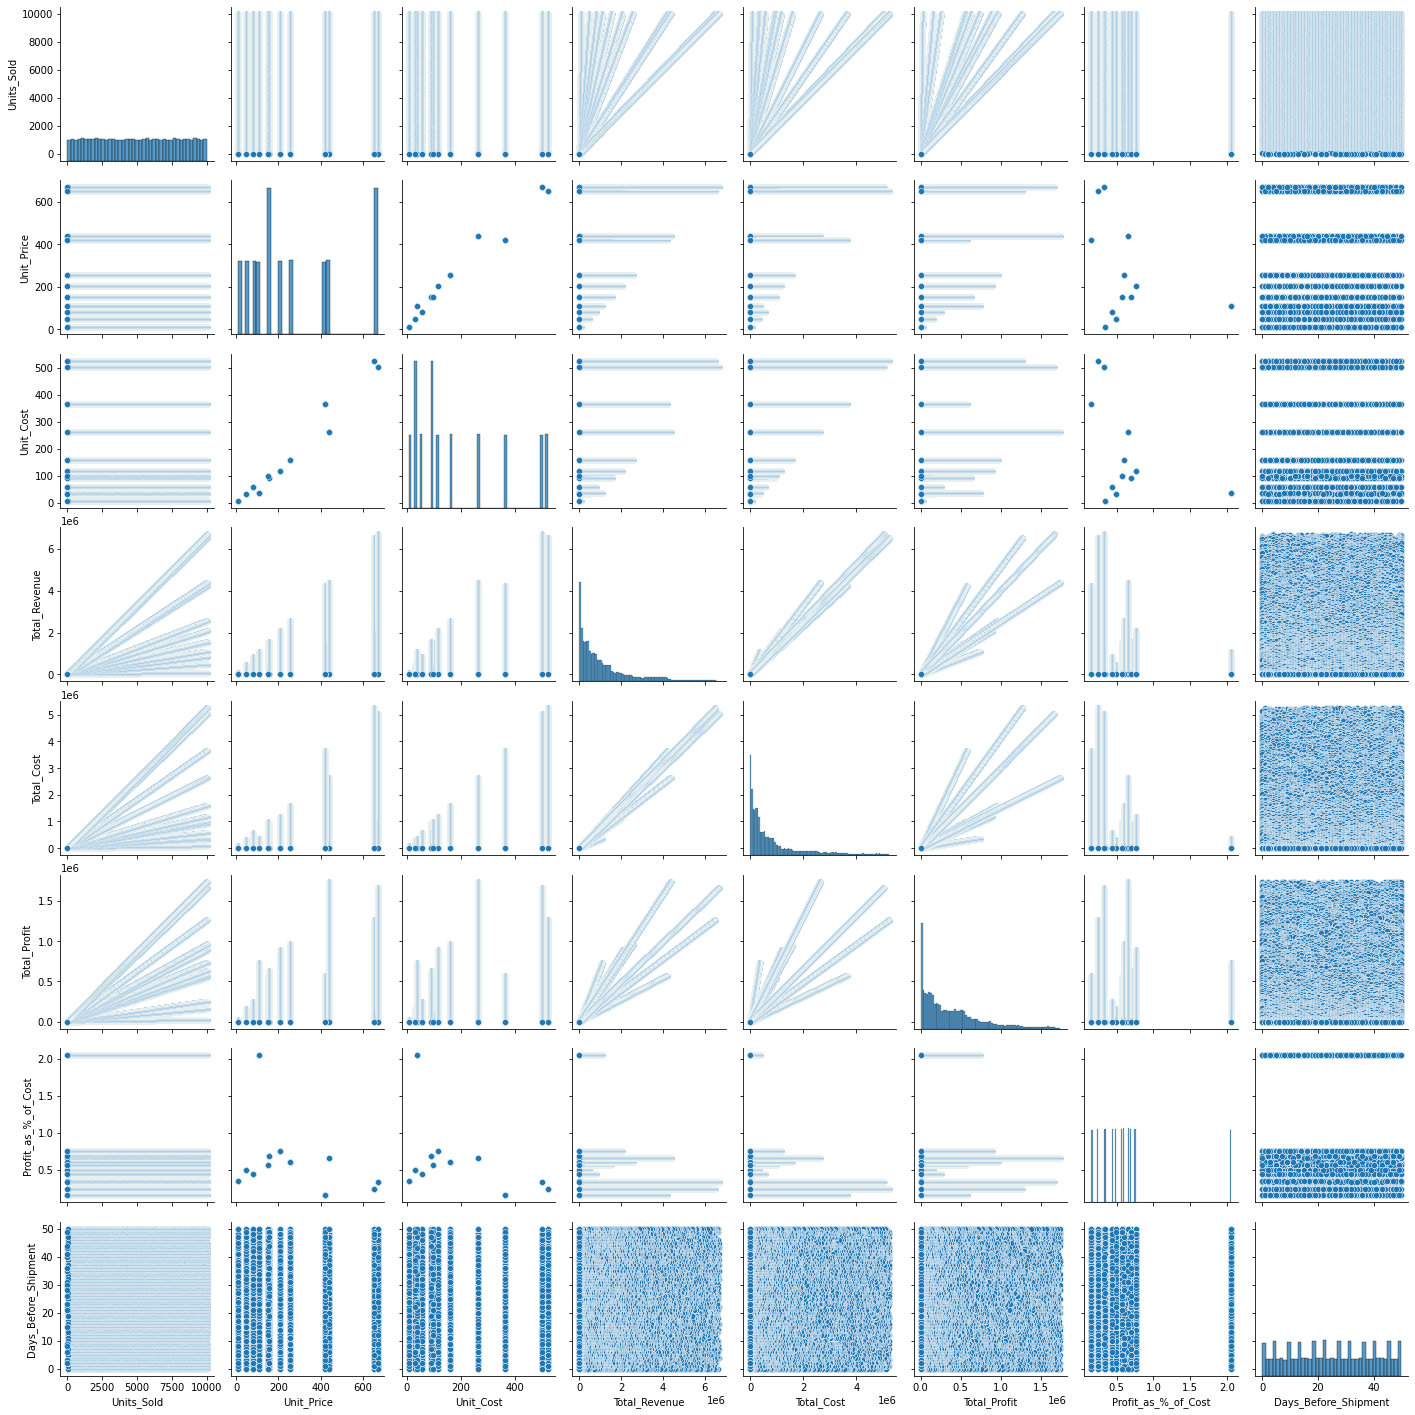

In [19]:
sns.pairplot(data[['Units_Sold','Unit_Price','Unit_Cost','Total_Revenue','Total_Cost','Total_Profit','Profit_as_%_of_Cost','Days_Before_Shipment']])

##  **Exploratory Data Analysis- Understanding the Profitability of Each Product and Each Region**

In [20]:
#Creating data for Time series plot

data['month_year'] = pd.to_datetime(data['Order_Date']).dt.to_period('M')
data.head()

,Region,Country,Item_Type,Fiscal_Year,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Profit_as_%_of_Cost,Days_Before_Shipment,month_year
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,2010-04-23,241891753,2010-04-26,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887,3,2010-04
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,2010-06-06,530075585,2010-07-01,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887,25,2010-06
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,2011-01-02,293357980,2011-01-22,10000,109.28,35.84,1092800.0,358400.0,734400.0,2.049107,20,2011-01
3,Europe,Sweden,Office Supplies,2012,Online,L,2012-10-02,360841929,2012-10-20,10000,651.21,524.96,6512100.0,5249600.0,1262500.0,0.240495,18,2012-10
4,Europe,Romania,Cosmetics,2016,Online,M,2016-03-16,707318103,2016-05-03,10000,437.20,263.33,4372000.0,2633300.0,1738700.0,0.660274,48,2016-03


In [21]:
data2 = data.groupby('month_year').agg({'Total_Profit':lambda x : x.sum()})
data2.reset_index().head()

,month_year,Total_Profit
0,2010-01,2.879548e+08
1,2010-02,2.554662e+08
2,2010-03,2.831274e+08
3,2010-04,2.743002e+08
4,2010-05,2.976359e+08


<Figure size 1080x1440 with 0 Axes>

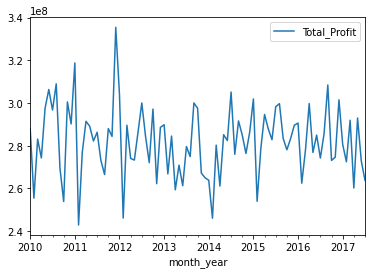

In [22]:
#Time Series plot of Total Porfit

fig = plt.figure(figsize=(15,20))
data2.plot()

From the above time series plot, Profit is not increasing that much from month-to-month.

## Understanding the Profitability of Item Type, Region and the Interactions

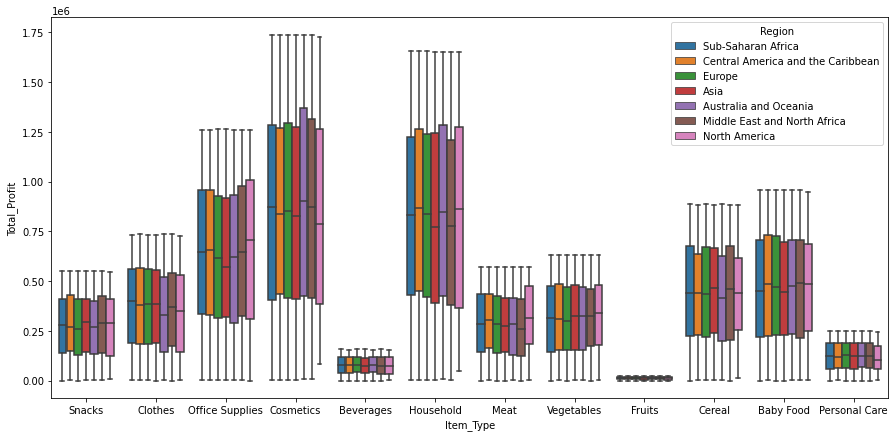

In [23]:
#Boxplot to show distributions with respect to categories

fig = plt.figure(figsize=(15,7))
sns.boxplot(x='Item_Type',y='Total_Profit',hue='Region',data=data)

From the above Box-Plot, there is evidence of difference in the profit distribution for different Item Types but the Profit distribution of for different Regions looks the same. We will further test this using Two-Way ANOVA to see if there is indeed statistically significant difference between the Profitability of different Item Types, or different Regions or the interaction between Item Types and Regions.

## Analysis of Variance (Two-Way Anova)
 We want to understand if there is a statistically significant difference in the Total Profits for among the Item Type and the Regions.Which **Product** shoud we drop? Which **Product** should we sell more in the next year moving forward? Should any **REGION** be given preference over others? This can only be answered if we find out that is doing well in terms of Profitability.

In [24]:
df= data[['Item_Type','Region','Total_Profit']]
df.head()

,Item_Type,Region,Total_Profit
0,Snacks,Sub-Saharan Africa,551400.0
1,Snacks,Sub-Saharan Africa,551400.0
2,Clothes,Central America and the Caribbean,734400.0
3,Office Supplies,Europe,1262500.0
4,Cosmetics,Europe,1738700.0


In order to use ANOVA, we will first test if Total Profit is normally distributed using histogram. If not, we will transform it.

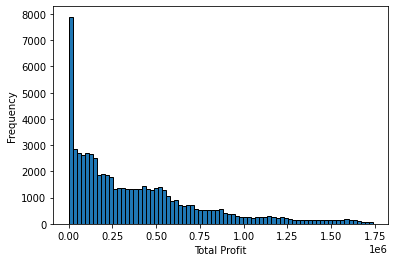

In [25]:
# histogram
plt.hist(df['Total_Profit'], bins='auto', histtype='bar', ec='k') 
plt.xlabel("Total Profit")
plt.ylabel('Frequency')
plt.show()

From the histogram above, **Total Profit** is very right skewed. Thus, there is a need to normalise the data.

In [26]:
#We want to determine the appropriate method of transformation by checking the relationship between the means and standard deviation of each Product


dfgr = df.groupby('Item_Type').agg({'Total_Profit':lambda x: x.mean()})
dfgr.rename(columns={ 'Total_Profit': 'Mean Profits'}, inplace=True)

dfgr2 = df.groupby('Item_Type').agg({'Total_Profit':lambda x: x.std()})

dfgr['Standard_Deviation']=dfgr2['Total_Profit']

dfgr.reset_index().head(10)


,Item_Type,Mean Profits,Standard_Deviation
0,Baby Food,471801.294958,278961.272203
1,Beverages,78157.155945,45558.845150
2,Cereal,443282.151263,255002.332480
3,Clothes,371222.569516,213628.396729
4,Cosmetics,859814.927486,502441.735070
5,Fruits,11987.605264,6967.924043
6,Household,830261.766776,475207.813552
7,Meat,283279.282899,163889.869838
8,Office Supplies,631973.859501,363023.468089
9,Personal Care,125224.372744,72588.128548


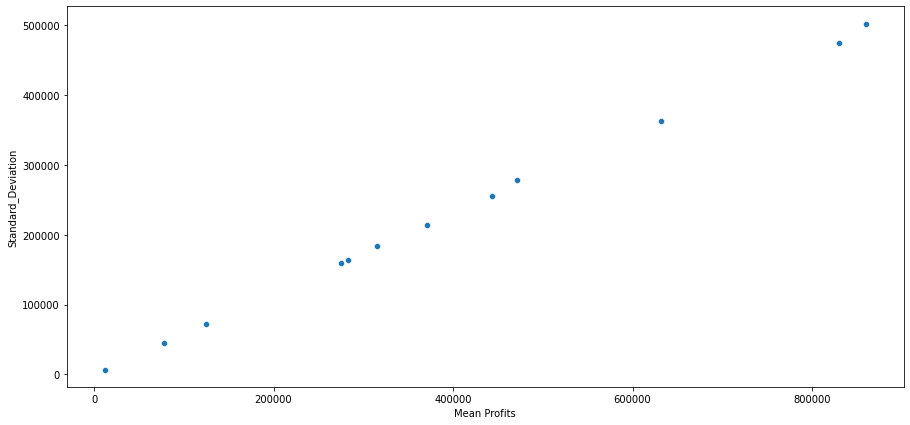

In [27]:
#Scatter Plot of the Means and Standard Deviations of Each Region

fig = plt.figure(figsize=(15,7))
sns.scatterplot(x='Mean Profits',y='Standard_Deviation',data=dfgr)

There seem to be a linear relationship between the Means and the standard deviations. There Square Root Transformation is the best form of transformation to use.

In [28]:
df['Sqrt_Total_Profit']=np.sqrt(df['Total_Profit'])


df.head()

,Item_Type,Region,Total_Profit,Sqrt_Total_Profit
0,Snacks,Sub-Saharan Africa,551400.0,742.563129
1,Snacks,Sub-Saharan Africa,551400.0,742.563129
2,Clothes,Central America and the Caribbean,734400.0,856.971411
3,Office Supplies,Europe,1262500.0,1123.610253
4,Cosmetics,Europe,1738700.0,1318.597740


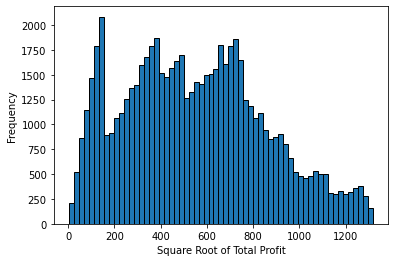

In [29]:
# histogram
plt.hist(df['Sqrt_Total_Profit'], bins='auto', histtype='bar', ec='k') 
plt.xlabel("Square Root of Total Profit")
plt.ylabel('Frequency')
plt.show()

Now the Square-Root of Total Profit is approximately normally distributed. The variance looks constant, thus we can go ahead and perform the **ANOVA** test.

In [30]:
# install
!pip install bioinfokit

     |████████████████████████████████| 92kB 7.5MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=631e0ce91e2d1a2bcc1b74b1dfb8a7cd1f267ea3e2ad848bf3690bbd7e0bfa40
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=548063b9e3b23e76438453c1d3f51151a033a7c7a8dc16fd0ea0ac77eb3b2020
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [31]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df, res_var='Sqrt_Total_Profit', anova_model='Sqrt_Total_Profit ~ C(Region)+C(Item_Type)+C(Region):C(Item_Type)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),6.0,2.694009e+05,4.490014e+04,1.034017,0.400731
C(Item_Type),11.0,3.236696e+09,2.942451e+08,6776.242836,0.000000
C(Region):C(Item_Type),66.0,3.202129e+06,4.851711e+04,1.117313,0.240000
Residual,65451.0,2.842081e+09,4.342304e+04,NaN,NaN


In [32]:
#ANOVA is robust to the Normality assumption. So we can still use the Data which hasnt been transformed
res = stat()
res.anova_stat(df=df, res_var='Total_Profit', anova_model='Total_Profit ~ C(Region)+C(Item_Type)+C(Region):C(Item_Type)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),6.0,4.568612e+11,7.614353e+10,1.022811,0.408046
C(Item_Type),11.0,4.505449e+15,4.095863e+14,5501.835554,0.000000
C(Region):C(Item_Type),66.0,5.505778e+12,8.342088e+10,1.120565,0.234650
Residual,65451.0,4.872525e+15,7.444538e+10,NaN,NaN


The p value obtained from ANOVA analysis for Item Type is statistically significant(p < 0.05) but Region and interaction are not statistically significant (p>0.05). We conclude that type of product does significantly affects the Total Profit, Region does not significantly affects the Total Profit, and interaction of both Region and Item Type does not significantly affects the Total Profit. 

***Multiple pairwise comparisons (Post-hoc test)***

Now, we know that **Item Type** differences are statistically significant, but ANOVA does not tell which **Product** are significantly different from each other. To know the pairs of significant different product, we perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey’s HSD test

In [33]:
# for main effect Item Type
res.tukey_hsd(df=df, res_var='Total_Profit', xfac_var='Item_Type', anova_model='Total_Profit~C(Region)+C(Item_Type)+C(Region):C(Item_Type)')
res.tukey_summary.sort_values('p-value')

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Snacks,Clothes,95853.328976,78763.688631,112942.969320,25.923876,0.001
35,Cosmetics,Cereal,416532.776224,399471.172631,433594.379817,112.837898,0.001
36,Cosmetics,Baby Food,388013.632528,371018.421989,405008.843067,105.522748,0.001
37,Cosmetics,Personal Care,734590.554742,717580.659488,751600.449995,199.604053,0.001
38,Beverages,Household,752104.610831,735061.255782,769147.965881,203.961790,0.001
...,...,...,...,...,...,...,...
19,Clothes,Baby Food,100578.725442,83514.543982,117642.906902,27.242460,0.001
18,Clothes,Cereal,72059.581747,54929.274546,89189.888947,19.442506,0.001
24,Office Supplies,Meat,348694.576602,331593.976121,365795.177083,94.245254,0.001
65,Baby Food,Personal Care,346576.922214,329573.196092,363580.648336,94.206571,0.001


From the above output, there is significant difference in the Total Profit among different Item Types except for **Snacks** and **Meat** which are not significantly different.

#### Since there significant dfference in the Total Profit among different **Item Types** we want to be able to group them based on similar profit behaviour.

In [34]:
df = data.groupby('Item_Type').agg({'Total_Profit':lambda x: x.sum(),'Units_Sold':lambda x: x.sum(),'Order_ID': lambda x: x.count()})
df.rename(columns={ 'Order_ID': 'No._of_Orders'}, inplace=True)

df=df.reset_index()

In [35]:
df2= data.groupby('Item_Type').agg({'Total_Profit':lambda x: x.mean(),'Units_Sold':lambda x: x.mean()})
df2 =df2.reset_index()
df['Average_Profit']=df2['Total_Profit']
df['Average_Units']=df2['Units_Sold']

df

,Item_Type,Total_Profit,Units_Sold,No._of_Orders,Average_Profit,Average_Units
0,Baby Food,2.599625e+09,27118977,5510,471801.294958,4921.774410
1,Beverages,4.293954e+08,27419886,5494,78157.155945,4990.878413
2,Cereal,2.404806e+09,27145340,5425,443282.151263,5003.749309
3,Clothes,2.009799e+09,27366544,5414,371222.569516,5054.773550
4,Cosmetics,4.730702e+09,27208269,5502,859814.927486,4945.159760
5,Fruits,6.512866e+07,27024340,5433,11987.605264,4974.110068
6,Household,4.529908e+09,27333061,5456,830261.766776,5009.725257
7,Meat,1.532258e+09,26787721,5409,283279.282899,4952.435016
8,Office Supplies,3.455633e+09,27371351,5468,631973.859501,5005.733541
9,Personal Care,6.876070e+08,27438429,5491,125224.372744,4996.982153


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item_Type       12 non-null     object 
 1   Total_Profit    12 non-null     float64
 2   Units_Sold      12 non-null     int64  
 3   No._of_Orders   12 non-null     int64  
 4   Average_Profit  12 non-null     float64
 5   Average_Units   12 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 704.0+ bytes


In [37]:
df.shape

(12, 6)

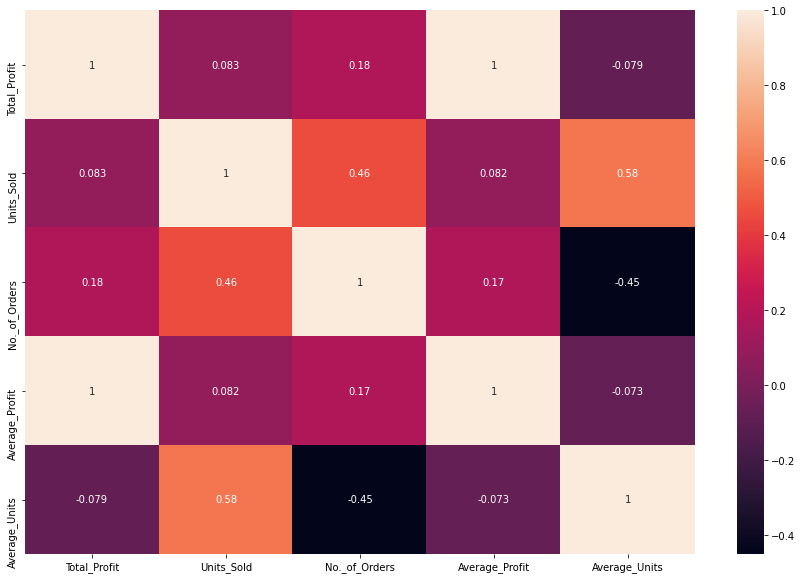

In [38]:
#Correlation between features



corr = df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

<Figure size 1440x720 with 0 Axes>

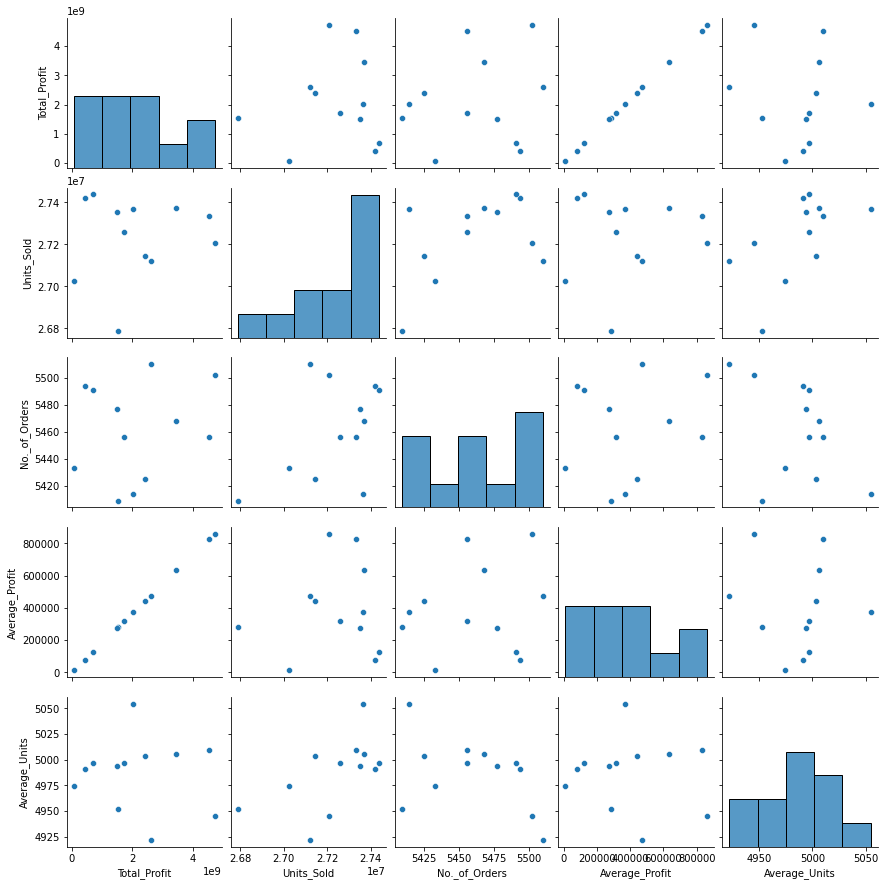

In [39]:
fig = plt.figure(figsize=(20,10))
sns.pairplot(df)

## K-Means Clustering
  We want to use the K-Means Clustering algorithm to group **PRODUCTS** with similar profitability behaviour.

In [40]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = df[[	'Average_Units','No._of_Orders','Average_Profit']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data

,Average_Units,No._of_Orders,Average_Profit
0,8.501,8.614,13.064
1,8.515,8.611,11.266
2,8.518,8.599,13.002
3,8.528,8.597,12.825
4,8.506,8.613,13.664
5,8.512,8.600,9.392
6,8.519,8.604,13.629
7,8.508,8.596,12.554
8,8.518,8.607,13.357
9,8.517,8.611,11.738


<Figure size 1440x720 with 0 Axes>

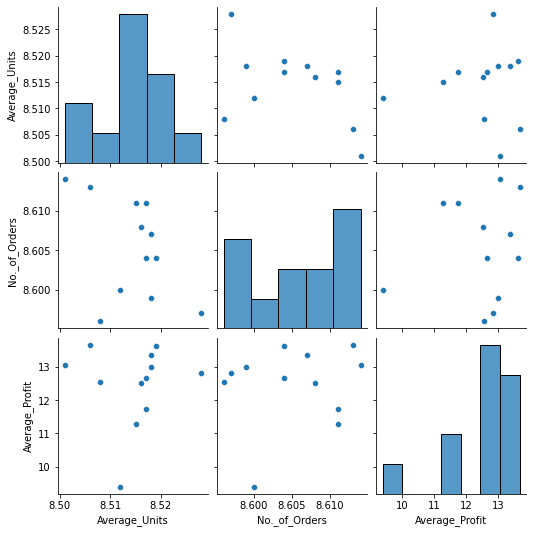

In [41]:
fig = plt.figure(figsize=(20,10))
sns.pairplot(Log_Tfd_Data)

### Scaling

Scale so all numbers are proportional


In [42]:
from sklearn.preprocessing import  StandardScaler


#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)


#Transform it back to dataframe

Scaled_Data = pd.DataFrame(Scaled_Data, index=df.index,columns=Log_Tfd_Data.columns)

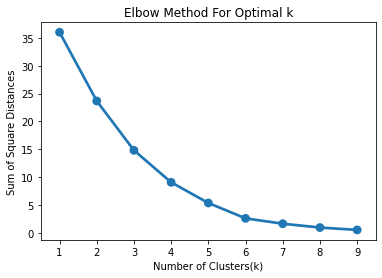

In [43]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
df['Cluster'] = KMean_clust.labels_
df

,Item_Type,Total_Profit,Units_Sold,No._of_Orders,Average_Profit,Average_Units,Cluster
0,Baby Food,2.599625e+09,27118977,5510,471801.294958,4921.774410,2
1,Beverages,4.293954e+08,27419886,5494,78157.155945,4990.878413,1
2,Cereal,2.404806e+09,27145340,5425,443282.151263,5003.749309,0
3,Clothes,2.009799e+09,27366544,5414,371222.569516,5054.773550,0
4,Cosmetics,4.730702e+09,27208269,5502,859814.927486,4945.159760,2
5,Fruits,6.512866e+07,27024340,5433,11987.605264,4974.110068,3
6,Household,4.529908e+09,27333061,5456,830261.766776,5009.725257,0
7,Meat,1.532258e+09,26787721,5409,283279.282899,4952.435016,0
8,Office Supplies,3.455633e+09,27371351,5468,631973.859501,5005.733541,0
9,Personal Care,6.876070e+08,27438429,5491,125224.372744,4996.982153,1


In [45]:
import plotly.express as px



fig = px.scatter(df, x="Average_Units", y="Average_Profit", text="Item_Type", size="Total_Profit",size_max=30,color="Cluster")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Total Profit VS Average Units Sold Per Order For Each Product', title_x=0.5)
fig.show()

From the above Scatter Plot, K-means clustering algorithm was used identify products who behave in a similar manner. For example, **Cosmetics** and **Baby Food** behave in a similar way. That is, they tend to have relatively low units sold per every order but have relatively higher Average Profit per every order. But **Household** , **Office Supplies**, **Cereals**, **Clothes** and **Vegetables** tend to have relatively high units sold per order and relatively high Average Profit per every order. The remaining products have high Average Units per order but are not doing so well in the profits they make per order. For example, **Fruits** make a lot of sales per order but has a lower average profit on order as compared to **Meat**.

In [46]:
fig = px.scatter(df, x="No._of_Orders", y="Average_Profit", text="Item_Type",size="Total_Profit",size_max=30,color="Cluster")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Average Profit Per Order Profit VS Average Unit Per Order For Each Product', title_x=0.5)
fig.show()

From the Scatter Plot above, **Cosmetics** and **Baby Food** receive a lot of orders more than another other product. **Household** , **Office Supplies**, **Cereals**, **Clothes**, **Meat** and **Vegetables** receive very low orders yet does pretty well in making high profits per order. **Snacks**,**Personal Care**, and **Beverage** are doing so well in the Number of Orders they get, but their profit is very small. Fruits isnt doing so well in any of the varibales (Number of Orders and Average Profit per Order).

In [47]:
fig = px.scatter(df, x="No._of_Orders", y="Average_Units", text="Item_Type",size="Total_Profit",size_max=30,color="Cluster")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Average Unit Per Order VS Total Number of Orders For Each Product', title_x=0.5)
fig.show()

## Linear Regression Model
  We want to use **LINEAR REGRESSION MODEL** to understand the rate at which **Expected Profititability** on each product changes as Units solds changes. This will help us understand which products should be sold more and which product should be dropped from selling.

In [48]:
df= data[['Item_Type','Units_Sold','Total_Profit']]
df.head()

,Item_Type,Units_Sold,Total_Profit
0,Snacks,10000,551400.0
1,Snacks,10000,551400.0
2,Clothes,10000,734400.0
3,Office Supplies,10000,1262500.0
4,Cosmetics,10000,1738700.0


Text(0, 0.5, 'Frequency')

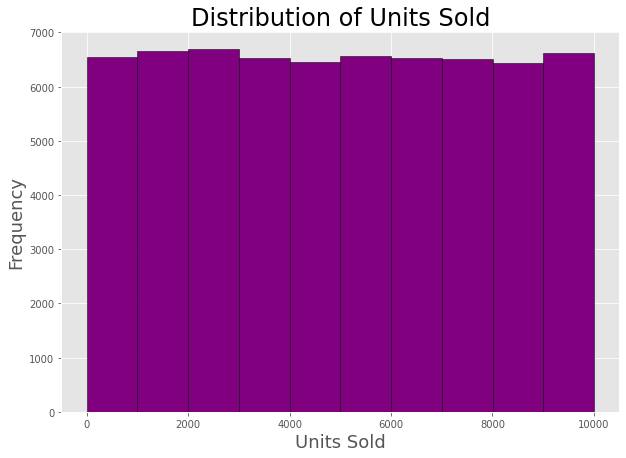

In [49]:
#Distribution of Units Sold and Total Profit


import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the Units Sold
df.Units_Sold.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Units Sold', size=24)
plt.xlabel('Units Sold',size=18)
plt.ylabel('Frequency', size=18)


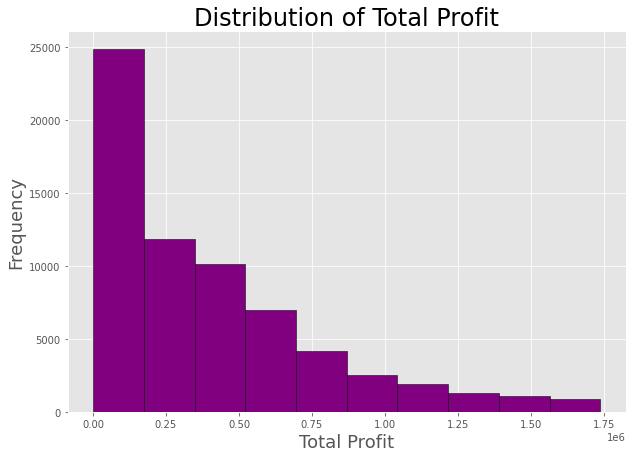

In [50]:
# histogram of the Total Profit
df.Total_Profit.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Total Profit', size=24)
plt.xlabel('Total Profit', size=18)
plt.ylabel('Frequency', size=18);

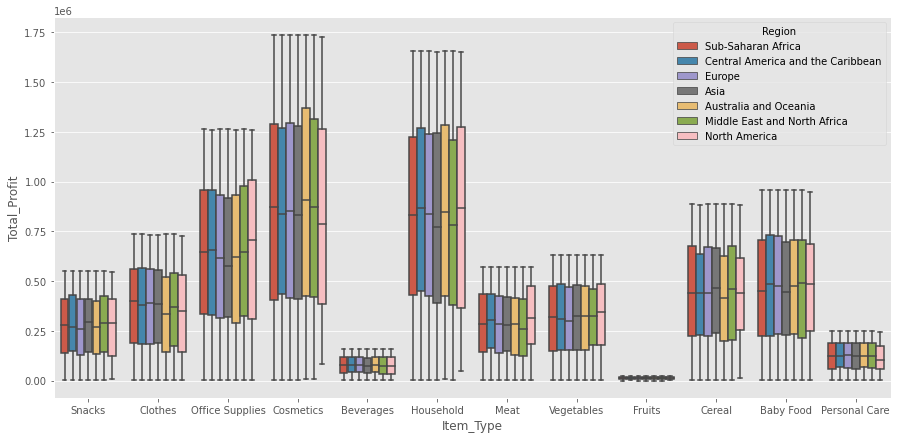

In [51]:
#Boxplot to show Total Profit distributions with respect to categories

fig = plt.figure(figsize=(15,7))
sns.boxplot(x='Item_Type',y='Total_Profit',hue='Region' ,data=data)

In [52]:
res = stat()
res.anova_stat(df=data, res_var='Total_Profit', anova_model='Total_Profit~ C(Region)+C(Item_Type)+C(Region):C(Item_Type)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),6.0,4.568612e+11,7.614353e+10,1.022811,0.408046
C(Item_Type),11.0,4.505449e+15,4.095863e+14,5501.835554,0.000000
C(Region):C(Item_Type),66.0,5.505778e+12,8.342088e+10,1.120565,0.234650
Residual,65451.0,4.872525e+15,7.444538e+10,NaN,NaN


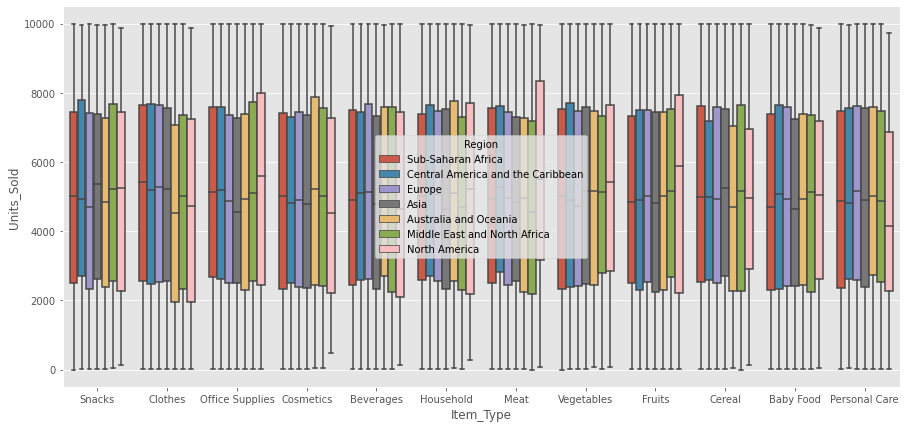

In [53]:
#Boxplot to show Units Sold distributions with respect to categories

fig = plt.figure(figsize=(15,7))
sns.boxplot(x='Item_Type',y='Units_Sold',hue = 'Region',data=data)

In [54]:
fig = px.scatter(df, x="Units_Sold", y="Total_Profit",size_max=100,color="Item_Type")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Total Profit VS Unit Sold', title_x=0.5)
fig.show()

In [55]:
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *

In [56]:
df.head()

,Item_Type,Units_Sold,Total_Profit
0,Snacks,10000,551400.0
1,Snacks,10000,551400.0
2,Clothes,10000,734400.0
3,Office Supplies,10000,1262500.0
4,Cosmetics,10000,1738700.0


In [57]:
lm = smf.ols('Total_Profit ~ Units_Sold* C(Item_Type)', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.345e+31
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        10:51:21   Log-Likelihood:             1.2089e+06
No. Observations:               65535   AIC:                        -2.418e+06
Df Residuals:                   65511   BIC:                        -2.418e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

After fitting the linear equation, we obtain the following multiple linear regression model:

$\hat{Profit}$ $=$ $95.86*$Units Sold $+(-$$80.20)*$Units Sold$*$Beverages $+(-$$7.270)*$Units Sold$*$Cereal $+(-$$22.42)*$Units Sold$*$Clothes $+$ $78.01*$Units Sold$*$Cosmetics $+$... $+(-$$40.72)*$Units Sold$*$Snacks $+(-$$32.73)*$Units Sold$*$Vegetable

If we want to predict the expected **Total Profit** based on the **Units Sold** for each Product, we obtain the following equation:



*   For Baby Food,  
$\hat{Profit}$ $=$ $95.86*$Units Sold


*   For Beverage,  
$\hat{Profit}$ $=$ $15.66*$Units Sold


*   For Cereals,  
$\hat{Profit}$ $=$ $88.59*$Units Sold


*   For Clothes,  
$\hat{Profit}$ $=$ $73.44*$Units Sold


*   For Cosmetics, 

    $\hat{Profit}$ $=$ $173.87*$Units Sold


*   For Fruits, 

    $\hat{Profit}$ $=$ $2.41*$Units Sold


*   For Household, 

  $\hat{Profit}$ $=$ $165.73*$Units Sold


*   For Meat,

   $\hat{Profit}$ $=$ $57.2*$Units Sold


*   For Office Supplies,

   $\hat{Profit}$ $=$ $126.25*$Units Sold


*   For Personal Care, 

    $\hat{Profit}$ $=$ $25.06*$Units Sold


*   For Snacks,  
    $\hat{Profit}$ $=$ $55.14*$Units Sold


*   For Vegetable, 

   $\hat{Profit}$ $=$ $63.13*$Units Sold

From the above Linear regression models for each Product, the model for **Cosmetics** tend to have the highest slope. The slope represents the expected change in Total Profit when there is once unit increase in the Units sold for each product. The regression model for **Cosmetics** shows a slope of 173.87 which means, if Units Sold increases by 1 unit, Total Profit would increase by 173.87. The regression model for **Fruits** has the least slope. In a nutshell, in the future, if Units Sold increases by the same units for all the products, **Cosmetics** will give us the highest profit and **Fruits** will give us the lowest profit.

Conclusion



1.   From the analysis, in the next year moving forward, **Cosmetics**, **Household**, **Office Supplies**, **Cereals**, **Clothes**, **Meat** and **Vegetables** should be sold more since they have pretty good profitabilities. But **Fruits** should be dropped since it is performing poorly in terms of profitability. 
2.   Also, from the K-Means Clustering, **Snacks**,**Personal Care**, and **Beverage**, should be sold more in the next year on the condition that there is an increase in their prices. These products turn to have large orders, and large units are sold per each order. Thus, a higher price on them will improve its profitability.



Also, no region should be given preference over the other since there is no evidence of a significant difference in the profitability of among different regions. That is, any Region will yield the same mean profit under the same conditions.

## Understanding Which Products are the easiest to sell.

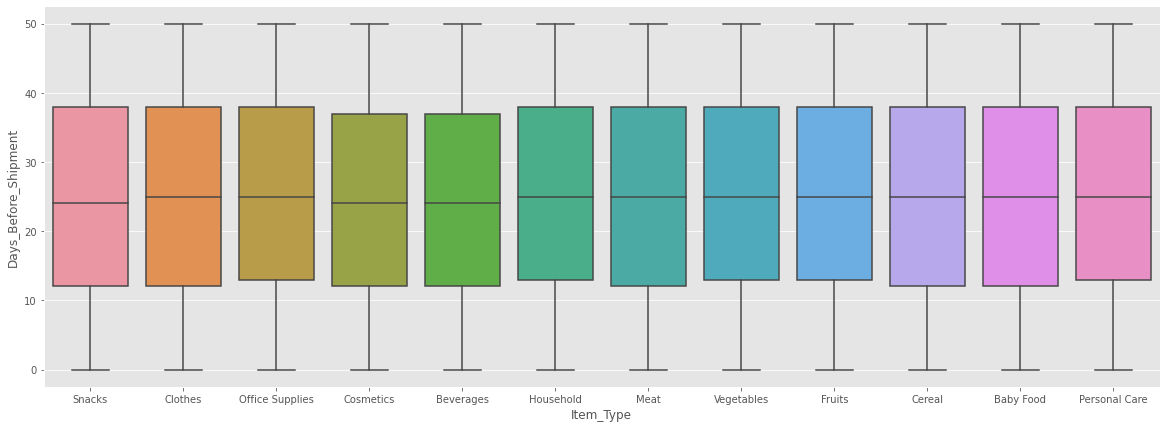

In [58]:
#Boxplot to show distributions with respect to Item Type

fig = plt.figure(figsize=(20,7))
sns.boxplot(x='Item_Type',y='Days_Before_Shipment',data=data)

From the above Box-Plots each Region and each Item Type have close to the same distribution for the No. of Days Before Shipment. The mean No. of Days before shipment for each Region seems equivalent. Also, the mean No. of Days before shipment for each Item Type seems the same. **ANOVA** test will be used to test if there is a statistically significant difference in the mean profit for each Region and also for each Item Type.

## ANOVA & Linear Regression Model

 We want to understand if there is a statistically significant difference in the No. of Days Before Shipment for all the Regions and also for all the Item Types. What is the easiest to sell and by which region?

In [59]:
df= data[['Region','Item_Type','Days_Before_Shipment']]
df.head()

,Region,Item_Type,Days_Before_Shipment
0,Sub-Saharan Africa,Snacks,3
1,Sub-Saharan Africa,Snacks,25
2,Central America and the Caribbean,Clothes,20
3,Europe,Office Supplies,18
4,Europe,Cosmetics,48


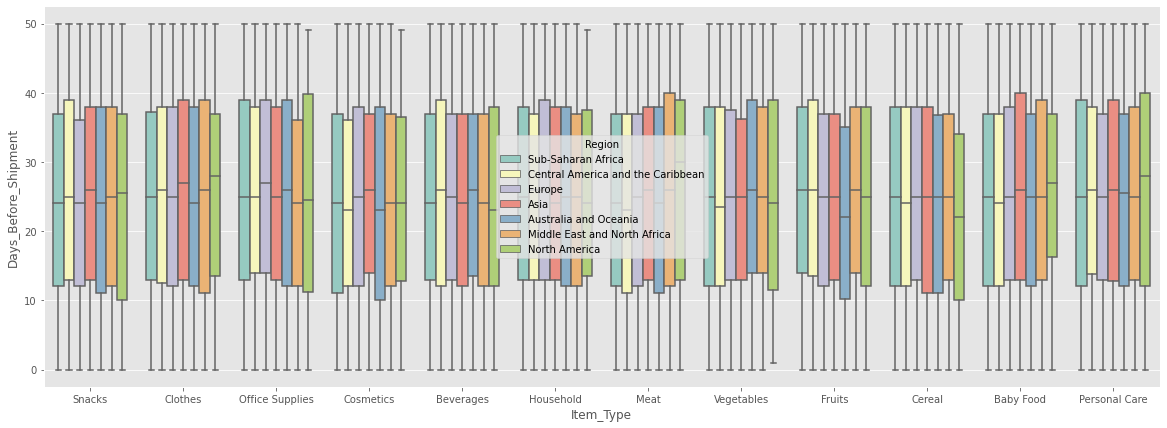

In [60]:
#Boxplot to show No. of Days Before Shipment with respect to each Region and Item Type

fig = plt.figure(figsize=(20,7))
sns.boxplot(x='Item_Type',y='Days_Before_Shipment',hue='Region',data=df,palette="Set3")

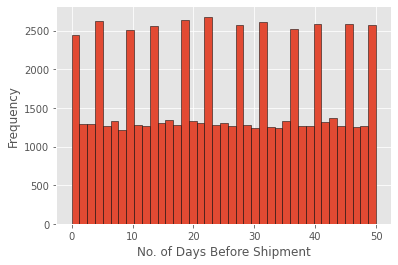

In [61]:
# histogram
plt.hist(df['Days_Before_Shipment'], bins='auto', histtype='bar', ec='k') 
plt.xlabel("No. of Days Before Shipment")
plt.ylabel('Frequency')
plt.show()

In [62]:
res = stat()
res.anova_stat(df=df, res_var='Days_Before_Shipment', anova_model='Days_Before_Shipment~ C(Region)+C(Item_Type)+C(Region):C(Item_Type)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),6.0,1.617934e+03,269.655737,1.250106,0.277032
C(Item_Type),11.0,3.508597e+03,318.963374,1.478693,0.131584
C(Region):C(Item_Type),66.0,1.356820e+04,205.578863,0.953050,0.585390
Residual,65451.0,1.411819e+07,215.706238,NaN,NaN


**Interpretation**

The p value obtained from ANOVA analysis for Item Type, Region, and interaction are not statistically significant (p>0.05). We conclude that type of product does not significantly affects the No. of Days before Shipment, Region does not significantly affects the No. of Days before Shipment, and interaction of both Region and Item Type does not significantly affects the No. of Days before Shipment. 

In conclusion, there is no evidence in this data to show the  products that are easiest to sell.



There is no relationship between products or regions.